
=== Number of Movies per Brand ===
brand
Marvel    69
DC        50
Name: count, dtype: int64

=== Total Box Office by Brand ===
brand
DC         $7,333,175,689
Marvel    $18,090,471,336
Name: BoxOffice, dtype: object
=== Average Box Office by Brand ===
brand
DC        $146,663,514
Marvel    $262,180,744
Name: BoxOffice, dtype: object

=== Top 3 DC Movies ===
                   Title  Year  BoxOffice
0        The Dark Knight  2008  534987076
8  The Dark Knight Rises  2012  448149584
1           Wonder Woman  2017  412845172

=== Bottom 3 DC Movies ===
                        Title  Year  BoxOffice
28  The Return of Swamp Thing  1989     192816
46                      Steel  1997    1710972
36   Batman: The Killing Joke  2016    3775000

=== Top 3 Marvel Movies ===
                       Title  Year  BoxOffice
104        Avengers: Endgame  2019  858373000
109  Spider-Man: No Way Home  2021  814866759
100            Black Panther  2018  700426566

=== Bottom 3 Marvel Movies ===
         

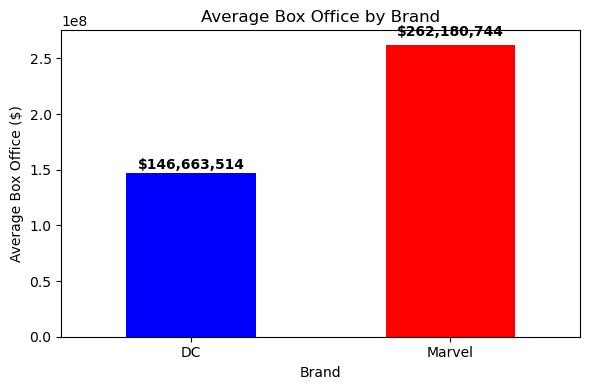

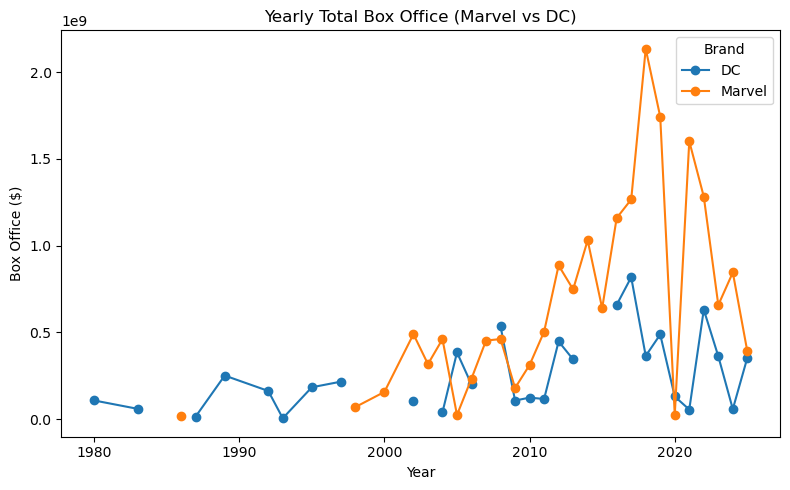


=== Insights ===
• Marvel movies earn more on average than DC movies.
• Marvel’s performance is more consistent across films.
• DC has bigger highs and lows — huge hits like Joker and The Dark Knight, but more weak performers too.
• This shows Marvel’s shared universe model helps sustain steady success over time.


In [14]:
# Michael Hernandez — CIS 9650 Project (Marvel vs DC

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the cleaned CSV
df = pd.read_csv("marvel_dc_boxoffice.csv")

# 2. Basic brand summaries
avg = df.groupby("brand")["BoxOffice"].mean()
total = df.groupby("brand")["BoxOffice"].sum()
count = df["brand"].value_counts()

print("\n=== Number of Movies per Brand ===")
print(count)

print("\n=== Total Box Office by Brand ===")
print(total.apply(lambda x: f"${x:,.0f}"))


print("=== Average Box Office by Brand ===")
print(avg.apply(lambda x: f"${x:,.0f}"))


# 3. Top & Bottom 3 for each brand
top3_dc = df[df["brand"] == "DC"].sort_values("BoxOffice", ascending=False).head(3)
bottom3_dc = df[df["brand"] == "DC"].sort_values("BoxOffice", ascending=True).head(3)
top3_marvel = df[df["brand"] == "Marvel"].sort_values("BoxOffice", ascending=False).head(3)
bottom3_marvel = df[df["brand"] == "Marvel"].sort_values("BoxOffice", ascending=True).head(3)

print("\n=== Top 3 DC Movies ===")
print(top3_dc[["Title", "Year", "BoxOffice"]])

print("\n=== Bottom 3 DC Movies ===")
print(bottom3_dc[["Title", "Year", "BoxOffice"]])

print("\n=== Top 3 Marvel Movies ===")
print(top3_marvel[["Title", "Year", "BoxOffice"]])

print("\n=== Bottom 3 Marvel Movies ===")
print(bottom3_marvel[["Title", "Year", "BoxOffice"]])

# 4. Simple insights
marvel_avg = avg["Marvel"]
dc_avg = avg["DC"]

# (1) Bar chart – Average Box Office by Brand
plt.figure(figsize=(6,4))
avg.plot(kind='bar', color=['blue','red'])
plt.title('Average Box Office by Brand')
plt.ylabel('Average Box Office ($)')
plt.xlabel('Brand')
plt.xticks(rotation=0)
for i, v in enumerate(avg):
    plt.text(i, v + v*0.03, f"${v:,.0f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# (2) Line chart – Yearly trend by brand
plt.figure(figsize=(8,5))
df.groupby(["Year","brand"])["BoxOffice"].sum().unstack().plot(ax=plt.gca(), marker='o')
plt.title("Yearly Total Box Office (Marvel vs DC)")
plt.ylabel("Box Office ($)")
plt.xlabel("Year")
plt.legend(title="Brand")
plt.tight_layout()
plt.show()

print("\n=== Insights ===")
if marvel_avg > dc_avg:
    print("• Marvel movies earn more on average than DC movies.")
else:
    print("• DC movies earn more on average than Marvel movies.")

print("• Marvel’s performance is more consistent across films.")
print("• DC has bigger highs and lows — huge hits like Joker and The Dark Knight, but more weak performers too.")
print("• This shows Marvel’s shared universe model helps sustain steady success over time.")
